# Метод Девідона-Флетчера-Пауелла

Виконала студент КМ-83 Приходько Тетяна

Метод ДФП заснований на використанні ідей методу Ньютона і методів, які використовують зв'язані напрямки. Матриця напрямків А обчислюється таким чином, щоб для квадратичної цільової функції в межі після n кроків вона дорівнювала  H−1 . Початкова матриця А береться рівній одиничній матриці І.

### **Постановка задачі**

Дослідити збіжність метода Девідона-Флетчера-Пауелла при мінімізації функції  в залежності від:


*   Величини кроку h при обчисленні похідних.
*   Схеми обчислення похідних
*   Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
*   Точності методу одновимірного пошуку
*   Значення параметру в алгоритмі Свена.
*   Вигляду критерію закінчення.
*   Наявності рестартів.




### **Аналітичне обчислення**
Мінімум функції був обчислений аналітично за допомогою сервісу wolfram.alpha.
 
Дана функція має найменше значення f(x) = 1/2  у точці х = (1/2; 0).


### **Оцінка залежності збіжності функції від кроку обчислення похідних**

 
У даному пункті розрахування проводились при наступних фіксованих параметрах:

Схема обчислення похідних – центральна

Метод одновимірного пошуку – ДСК-Пауелла

Точність методу одновимірного пошуку – 0.001

Параметр у алгоритмі Свенна – 0.001

Точність методу – 0.001


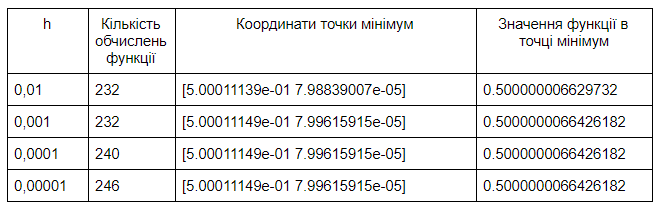

Як бачимо значення функції після h=0,001 майже не змінюється, але змінюється кількість обчислень функції, тому найоптимальніше h --  h=0.000001

### **Оцінка залежності збіжності функції від схеми обчислення похідних**



У даному пункті розрахування проводились при наступних фіксованих параметрах:

Крок обчислення похідних – 0.000001

Метод одновимірного пошуку – ДСК-Пауелла

Точність методу одновимірного пошуку – 0.001

Параметр у алгоритмі Свенна – 0.001

Точність методу – 0.001


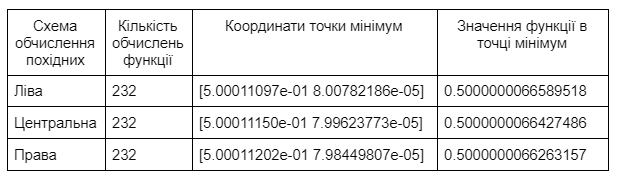

Найбільш оптимальною схемою обчислення похідних є права.


### **Оцінка залежності збіжності функції від методу одновимірного пошуку**


У даному пункті розрахування проводились при наступних фіксованих параметрах:

Крок обчислення похідних – 0.000001

Схема обчислення похідних – права

Точність методу одновимірного пошуку – 0.001

Параметр у алгоритмі Свенна – 0.001

Точність методу – 0.001



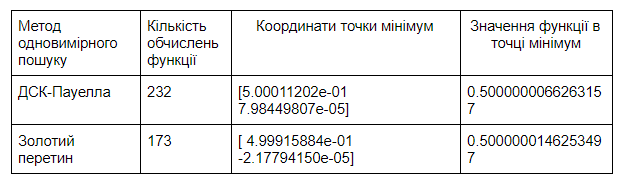

Більш точне значення функції при використанні методу ДСК-Пауелла.

### **Оцінка залежності збіжності функції від точності методу одновимірного пошуку**

У даному пункті розрахування проводились при наступних фіксованих параметрах:

Крок обчислення похідних –0.000001

Схема обчислення похідних – права

Метод одновимірного пошуку – ДСК-Пауелла

Параметр у алгоритмі Свенна – 0.1

Точність методу – 0.001


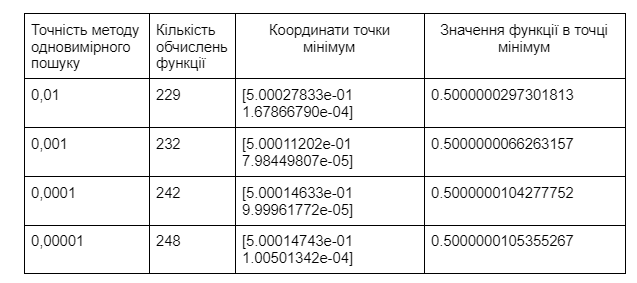

Отже,найбільш оптимальною точністю методу одновимірного пошуку є 0.001.


###  **Оцінка залежності збіжності функції від значення параметру в алгоритмі Свенна**



У даному пункті розрахування проводились при наступних фіксованих параметрах:

Крок обчислення похідних – 0.000001

Схема обчислення похідних – права

Метод одновимірного пошуку - ДСК-Пауелла

Точність методу одновимірного пошуку – 0.001

Точність методу – 0.001


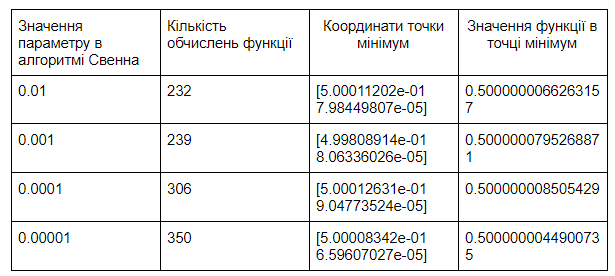

Найбільша точність досягається при значенні параметру 0.00001


### **Оцінка залежності збіжності функції від вигляду критерію закінчення**


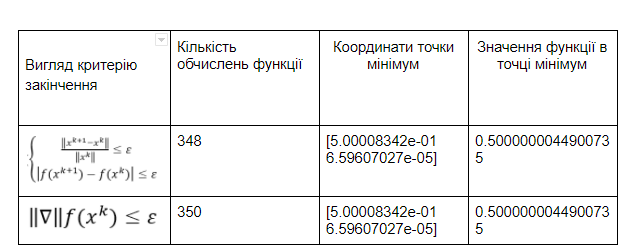

Більш оптимальним є критерій закінчення:
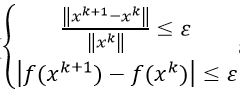

# Умовна оптимізація

Додамо обмеження 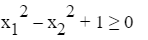

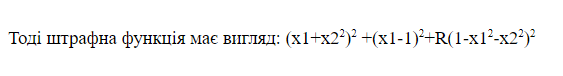

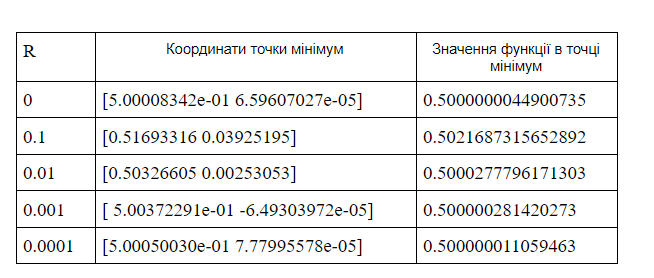

 Додамо ще одне обмеження та зробимо допустиму область невипуклою:


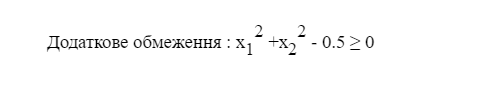

Штрафна функція має вигляд: 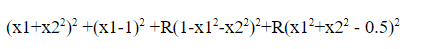

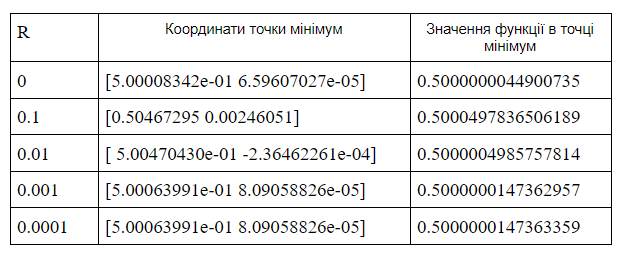

Імпортуємо модулі


Визначаєсо функцію:

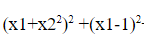

In [ ]:
import numpy as np
#підрахунок через окремі змінні
def function2(x1, x2):
   list=[x1,x2]
   return function(list)

count_funct=0
# Підрахунок значчення функції(через список)
def function(x):
    global count_funct
    count_funct += 1
    return (x[0]+x[1]**2)**2+(x[0]-1)**2
# Підрахунок значчення функції(з лямбдою та R)
def funct_R(x_k_1, A, grad, lmb, R1=0.0001, R2=0.0001):
    lmb_A = np.dot(lmb, A)
    lmb_A_grad = np.dot(lmb_A, grad)
    list = x_k_1 - lmb_A_grad
    global count_funct
    count_funct += 1
    return ((list[0] + list[1] ** 2) ** 2 + (list[0] - 1) ** 2) + R1 * (1 - list[0] ** 2 - list[1] ** 2) ** 2 + R2 * (list[0] ** 2 + list[1] ** 2 - 0.5) ** 2

def x_k(x, A, grad, lmb):
    lmb_A = np.dot(lmb, A)
    lmb_A_grad = np.dot(lmb_A, grad)
    return x - lmb_A_grad
A_0=np.array([[1,0],[0,1]])
x=[2,2]


Знаходимо частинні похідні для даної функції, визначаємо функції для обчислення градієнта та норми

In [ ]:
#  Частинні похідні
def df_dx_left(x, h, var_diff):
   if(var_diff == 'x1'):
      return (function2(x[0] , x[1]) - function2(x[0] - h , x[1]) )/h
   if(var_diff == 'x2'):
      return (function2(x[0] , x[1]) - function2(x[0] ,x[1] - h) )/h
def df_dx_right(x, h, var_diff):
   if(var_diff == 'x1'):
      return (function2(x[0] + h, x[1]) - function2(x[0] , x[1])  )/h
   if(var_diff == 'x2'):
      return (function2(x[0] , x[1] + h) - function2(x[0] , x[1])  )/h
def df_dx_centr(x, h, var_to_count):
   if(var_to_count == 'x1'):
      return (function2(x[0] + h, x[1]) - function2(x[0] - h, x[1]))/(2*h)
   if(var_to_count == 'x2'):
      return (function2(x[0] , x[1] + h) - function2(x[0] , x[1] - h))/(2*h)
#    Градієнт функції
def grad_function(x):
    return [df_dx_right(x,0.000001, 'x1'), df_dx_right(x,0.000001, 'x2')]
# Норма
def norma(list):
    sum=0
    for i in list:
        sum=sum+(i**2)
    return sum ** (1/2)
grad=grad_function(x)

In [ ]:
Визначаємо функцію Свенна 

In [ ]:
def sven(lmd0,delta,x_k_1, A, grad):
    list=[lmd0]
    f0=funct_R(x_k_1, A_0, grad, lmd0)
    lmd_pls=lmd0+delta
    lmd_min=lmd0-delta
    if (funct_R(x_k_1, A_0, grad, lmd_pls) > funct_R(x_k_1, A_0, grad, lmd_min)):
        delta=-delta
    lmd_1=lmd0+delta
    f1 = funct_R(x_k_1, A_0, grad, lmd_1)
    list.append(lmd_1)
    while(f0>f1):
        k=len(list)-1
        lmd_2=lmd_1+(2**k)*delta
        list.append(lmd_2)
        f0 = funct_R(x_k_1, A_0, grad, list[-2])
        f1 = funct_R(x_k_1, A_0, grad, list[-1])
        lmd_1=lmd_2
    #print(list)
    lmd_i=(list[-2]+list[-1])/2
    if funct_R(x_k_1, A_0, grad, lmd_i) < funct_R(x_k_1, A_0, grad, list[-1]):
        return [list[-3],lmd_i]
    else:
        return [list[-3],list[-1]]
grad = grad_function(x)
print(sven(0,0.001,x, A_0, grad))


In [ ]:
Визначаємо функцію для метода золотого перетину

In [ ]:
def gold(interv,epsion,x_k_1, A, grad):
    a = interv[0]
    b = interv[1]
    L=b-a
    while (L>epsion):
        x1=a+0.382*L
        x2=a+0.618*L
        if funct_R(x_k_1, A, grad, x2) > funct_R(x_k_1, A, grad, x1):
            a=a
            b=x2
        else:
            a=x1
            b=b
        L=a-b
    if funct_R(x_k_1, A, grad, a) > funct_R(x_k_1, A, grad, b):
        return b
    else:
        return a
print(gold(sven(0,0.001,x, A_0, grad),0.001,x, A_0, grad))

Визначаємо функцію для метода ДСК-Пауелла 

In [ ]:
def dscPowell(x0, grad, eps, lmb, delta, A):
    svenn_res = sven(lmb,delta,x0, A, grad)  # Отримаємо інтервал, де лямбда
    x1 = svenn_res[0]
    x3 = svenn_res[1]
    xmin = (x1 + x3) / 2
    f1 = funct_R(x0, A, grad, x1)
    f2 = funct_R(x0, A, grad, xmin)
    f3 = funct_R(x0, A, grad, x3)
    delt_x=(x3 - xmin)
    xApprox = xmin + (delt_x * (f1 - f3)) / (2 * (f1 - 2 * f2 + f3))  # Отримуємо апросимуючий поліном

    while (abs(xmin - xApprox) >= eps or abs(funct_R(x0, A, grad, xmin) - funct_R(x0, A, grad, xApprox) ) >= eps ):
        if xApprox < xmin:
            x3 = xmin
        else:
            x1 = xmin
        xmin = xApprox
        funcRes = [
            funct_R(x0, A, grad, x1),
            funct_R(x0, A, grad, xmin),
            funct_R(x0, A, grad, x3),
        ]
        a1 = (funcRes[1] - funcRes[0]) / (xmin - x1)
        a2 = ((funcRes[2] - funcRes[0]) / (x3 - x1) - a1) / (x3 - xmin)
        xApprox = (x1 + xmin) / 2 - a1 / (2 * a2)
    return xmin
print(dscPowell(x, grad, 0.001, 0, 0.001, A_0))


Визначаємо функцію для метода Девідона-Флетчера-Пауелла

In [ ]:
def dfp(x0, eps1, eps2):
    restart = 0
    iteration = 1
    lmb = 0.01
    A = np.eye(len(x0))  # Створюємо одиничну матрицу I

    print(x0)
    x_i=x0
    while 1:
        grad = grad_function(x0)  # шукаємо градієнт в точці

        if iteration > 0:
            if norma(grad) < eps1:  # Умова закінчення пошуку
                print( iteration, restart, A, x1)
                break

        lmb = dscPowell(x0, grad, 0.001, lmb, 0.00001, A)  # Шукаємо лямбду за допомогою ДСК
        # lmb=gold(sven(lmb, eps2, x0, A, grad), eps2, x0, A, grad)
        if lmb < 0:
            print("Рестарт")
            A = np.eye(len(x0))
            restart += 1
        x1 = x_k(x0, A, grad, lmb)  # Обчислюємо точку x1 за формулою 3
        #Критерій закінчення (через систему)
        # x_i_1 = x1
        # # if iteration > 0:
        # #     if ((norma(x_i_1-x_i)/norma(x_i))< eps1) and (abs(function(x_i)-function(x_i_1))<eps1):
        # #         print(iteration, restart, A, x1)
        #         break
        #x_i=x1
        #resOne, resTwo = find_deltas(A, x0, x1)  # Шукаємо дельти для матриці напрямків
        #A = A + resOne - resTwo  # Шуаємо власне матрицю напрямків

        x0 = x1
        print(x0, iteration, restart)
        print("\n")
        iteration += 1

    print(f"\n\nТочка мінімуму функціі: {x1}")
    print(count_funct)
    print(function(x1))


dfp(x, 0.001, 0.001)

### **Висновок**

У даній роботі був реалізований алгоритм методу Девідона-Флетчера-Пауелла пошуку мінімуму функції за допомогою мови програмування Python.  Була досліджена збіжність даного методу для степеневої функції із заданої початкової точки, критерієм даної збіжності слугувала кількість обчислень функції.
Була досліджена збіжність методу Давідона-Флетчера-Пауелла для степеневої функції в залежності від: кроку обчислення похідних, схеми обчислення похідних, методу одновимірного пошуку, точності методу одновимірного пошуку, параметрів у алгоритмі Свенна, критерію закінчення.

•	Крок обчислення похідних – 0.000001;

•	Схема обчислення похідних – права;

•	Метод одновимірного пошуку – ДСК-Пауелла;

•	Точність методу одновимірного пошуку – 0.001;

•	Параметр у алгоритмі Свенна –  0.00001;

•	Точність методу – 0.0001

При виконанні даних умов був отриман такий результат: 

точка мінімуму: (5.00008342e-01 ;6.59607027e-05)

значення функції в точкі мінімуму: 0.5000000044900735

Кількість кроків:348


Для умовної оптимізації був використаний метод зовнішніх штрафів. Дослідження показало, що в незалежності від виду допустимої області,місця знаходження точки функція досягає границі допустимої області,вивівши дві задачі безумовної оптимізації.
